# Capacitated Vehicle Routing Problem (CVRP)

The Capacitated Vehicle Routing Problem (CVRP) is a classic optimization problem in logistics and transportation. The goal is to determine the optimal set of routes for a fleet of vehicles to deliver goods to a set of customers, while respecting the capacity constraints of the vehicles.

The following notebook provides three different formulations to compare.

In [1]:
from generate_instance import generate_random_euclidean_graph_with_demands

graph = generate_random_euclidean_graph_with_demands(n=50, min_demand=1, max_demand=5)
vehicle_capacity = 15

In [2]:
# dirty hack to import the local module from inside
import sys

sys.path.append("..")

## Using `.add_circuit` on multiple copies for each vehicle

In [ ]:
from cvrp.cvrp_circuit import CvrpDuplicatedCircuits

from ortools.sat.python import cp_model

# solve first model
cvrp1 = CvrpDuplicatedCircuits(graph, depot=0, vehicle_capacity=vehicle_capacity, num_vehicles=15)
cvrp1.minimize_weight()
cvrp1.break_symmetries()

solver = cp_model.CpSolver()
solver.parameters.log_search_progress = True
solver.parameters.max_time_in_seconds = 60

status = solver.solve(cvrp1.model)
tours1 = cvrp1.extract_tours(solver)


Starting CP-SAT solver v9.12.4544
Parameters: max_time_in_seconds: 60 log_search_progress: true
Setting number of workers to 24

Initial optimization model '': (model_fingerprint: 0x5be0135f673d8653)
#Variables: 37'515 (#bools: 36'750 in objective)
  - 37'515 Booleans in [0,1]
#kCircuit: 15
#kExactlyOne: 49 (#literals: 735)
#kLinear2: 793
#kLinearN: 30 (#terms: 1'500)

Starting presolve at 0.00s
  4.78e-03s  0.00e+00d  [DetectDominanceRelations] 
  3.78e-02s  0.00e+00d  [PresolveToFixPoint] #num_loops=2 #num_dual_strengthening=1 
  7.44e-06s  0.00e+00d  [ExtractEncodingFromLinear] #potential_supersets=49 
  5.36e-04s  0.00e+00d  [DetectDuplicateColumns] 
  4.64e-03s  0.00e+00d  [DetectDuplicateConstraints] #duplicates=14 
[Symmetry] Graph for symmetry has 77'929 nodes and 117'568 arcs.
[Symmetry] Symmetry computation done. time: 0.00377255 dtime: 0.0107704
[SAT presolve] num removable Booleans: 0 / 37500
[SAT presolve] num trivial clauses: 0
[SAT presolve] [0s] clauses:749 literals:14

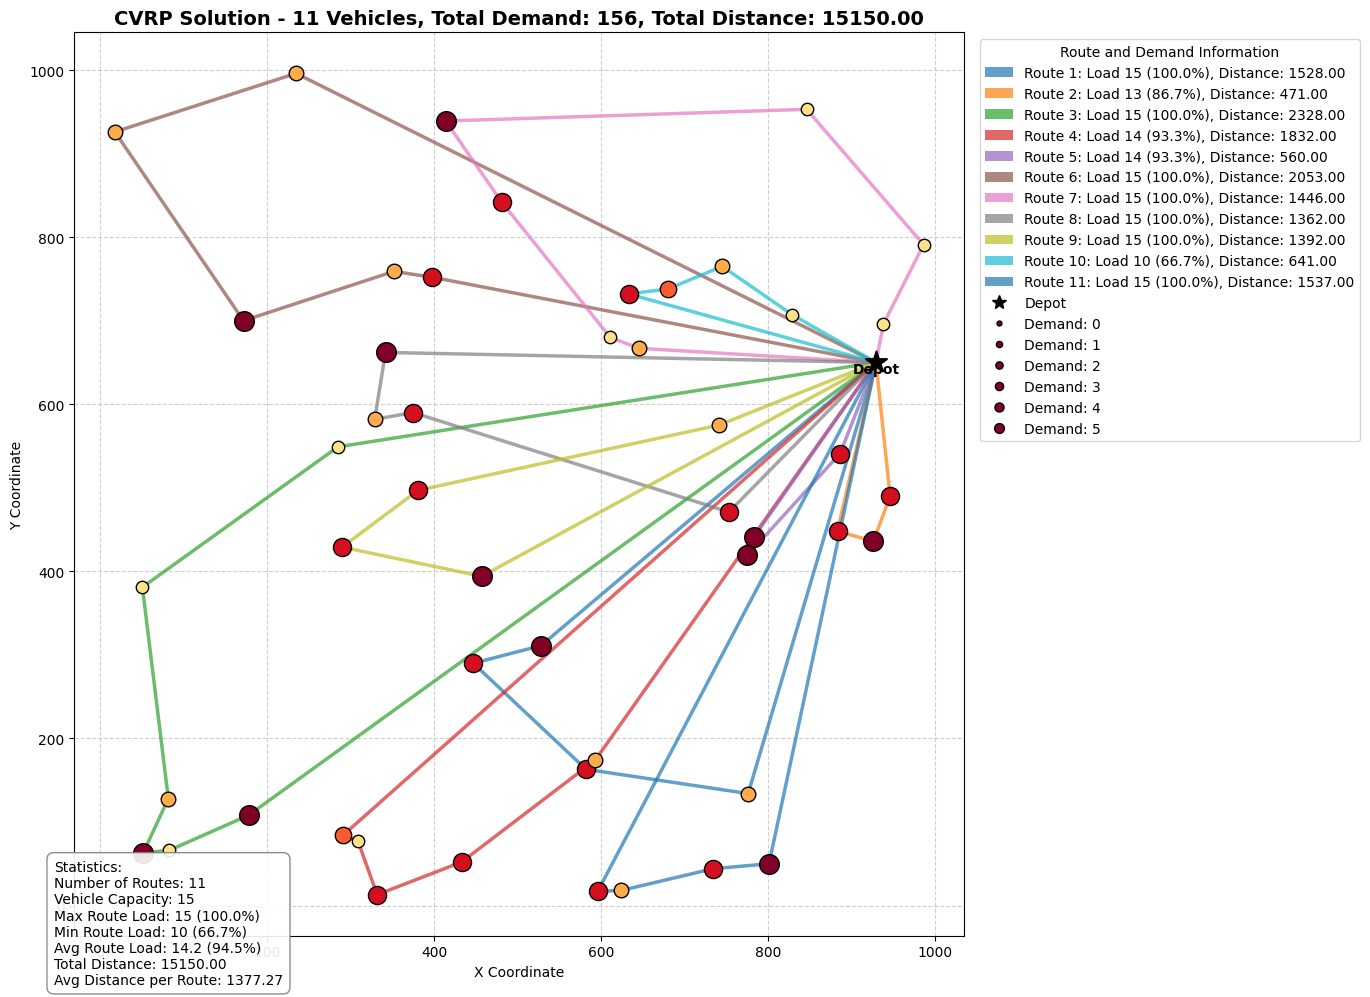

In [4]:
from visualize import plot_cvrp_solution
from matplotlib import pyplot as plt

plot_cvrp_solution(
    graph, depot=0, vehicle_capacity=vehicle_capacity, tours=tours1, show_legend=True
)
plt.show()

## Using `.add_multiple_circuits` to enforce the tours but additionally carry the capacities with MTZ-like constraints


Starting CP-SAT solver v9.12.4544
Parameters: max_time_in_seconds: 60 log_search_progress: true
Setting number of workers to 24

Initial optimization model '': (model_fingerprint: 0x5e4a3c525c4d92ed)
#Variables: 2'500 (#bools: 2'450 in objective)
  - 2'450 Booleans in [0,1]
  - 50 in [0,15]
#kLinear2: 2'401 (#enforced: 2'401)
#kRoutes: 1

Starting presolve at 0.00s
  5.52e-04s  0.00e+00d  [DetectDominanceRelations] 
  6.03e-03s  0.00e+00d  [PresolveToFixPoint] #num_loops=4 #num_dual_strengthening=2 
  5.93e-06s  0.00e+00d  [ExtractEncodingFromLinear] 
  5.97e-05s  0.00e+00d  [DetectDuplicateColumns] 
  3.04e-04s  0.00e+00d  [DetectDuplicateConstraints] 
  3.20e-04s  0.00e+00d  [DetectDuplicateConstraintsWithDifferentEnforcements] 
  2.08e-02s  2.91e-02d  [Probe] #probed=4'998 #new_bounds=49 #new_binary_clauses=3'528 
  4.10e-06s  0.00e+00d  [MaxClique] 
  5.35e-04s  0.00e+00d  [DetectDominanceRelations] 
  3.78e-03s  0.00e+00d  [PresolveToFixPoint] #num_loops=2 #num_dual_strengthening

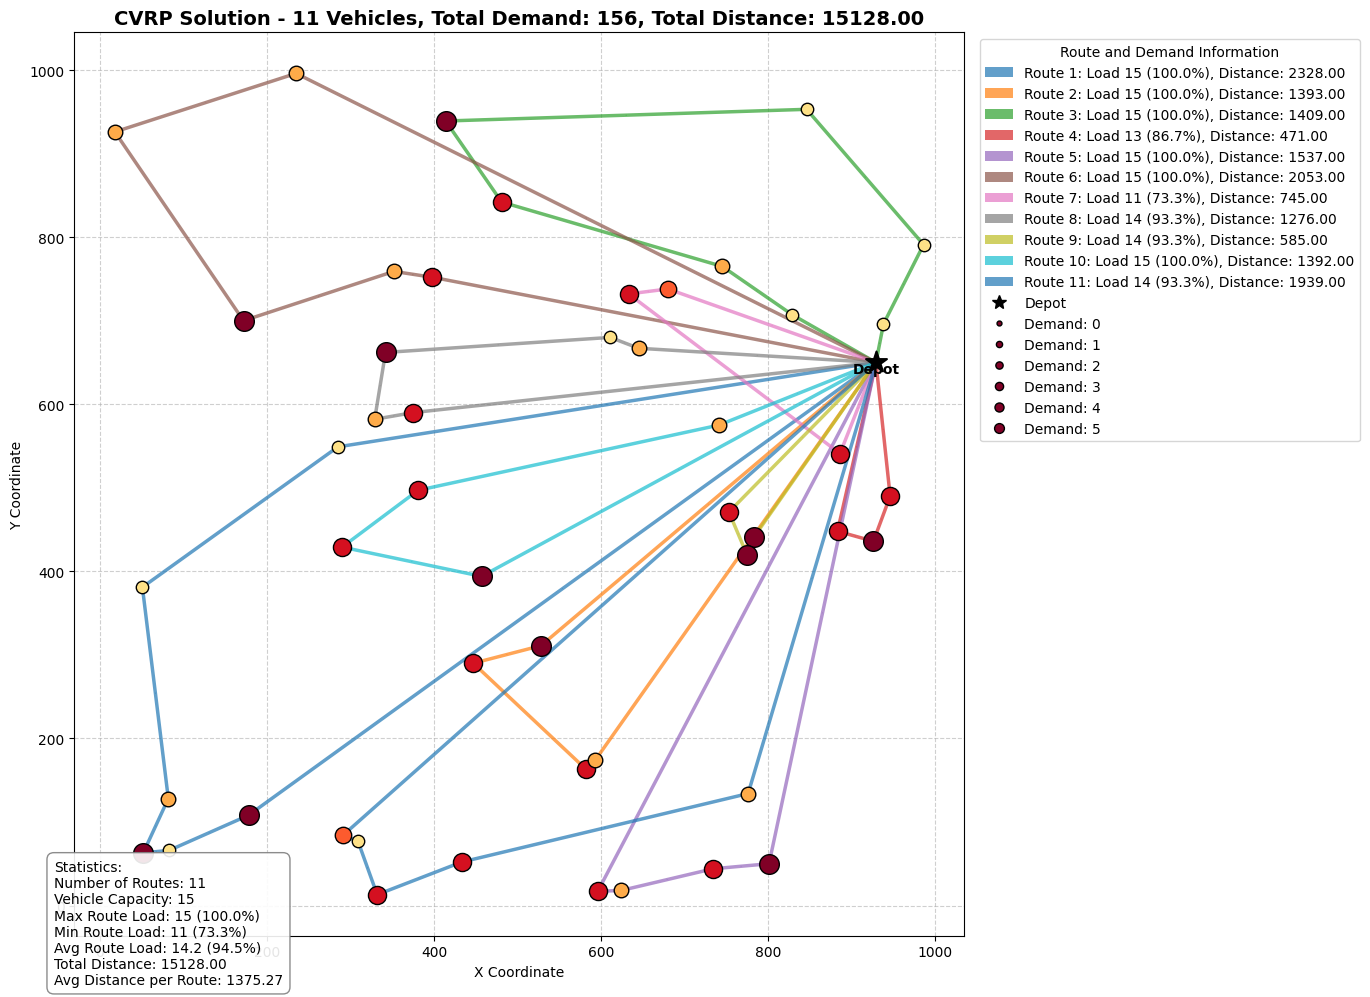

In [5]:
from cvrp.cvrp_multi_circuit import CvrpMultiCircuit

cvrp2 = CvrpMultiCircuit(graph, depot=0, capacity=vehicle_capacity)
cvrp2.minimize_weight()
solver = cp_model.CpSolver()
solver.parameters.log_search_progress = True
solver.parameters.max_time_in_seconds = 60
status = solver.solve(cvrp2.model)
tours2 = cvrp2.extract_tours(solver)
plot_cvrp_solution(
    graph, depot=0, vehicle_capacity=vehicle_capacity, tours=tours2, show_legend=True
)
plt.show()

## Only using MTZ


Starting CP-SAT solver v9.12.4544
Parameters: max_time_in_seconds: 60 log_search_progress: true
Setting number of workers to 24

Initial optimization model '': (model_fingerprint: 0x32b817290fcd1b4a)
#Variables: 2'500 (#bools: 2'450 in objective)
  - 2'450 Booleans in [0,1]
  - 50 in [0,15]
#kLinear2: 2'401 (#enforced: 2'401)
#kLinearN: 98 (#terms: 7'203)

Starting presolve at 0.00s
  6.64e-04s  0.00e+00d  [DetectDominanceRelations] 
  5.06e-03s  0.00e+00d  [PresolveToFixPoint] #num_loops=4 #num_dual_strengthening=2 
  3.20e-05s  0.00e+00d  [ExtractEncodingFromLinear] #potential_supersets=49 
  1.64e-04s  0.00e+00d  [DetectDuplicateColumns] 
  3.01e-04s  0.00e+00d  [DetectDuplicateConstraints] 
[Symmetry] Graph for symmetry has 7'448 nodes and 16'806 arcs.
[Symmetry] Symmetry computation done. time: 0.000520085 dtime: 0.00135148
  3.18e-04s  0.00e+00d  [DetectDuplicateConstraintsWithDifferentEnforcements] 
  1.46e-02s  1.84e-02d  [Probe] #probed=4'998 #new_bounds=49 #new_binary_clause

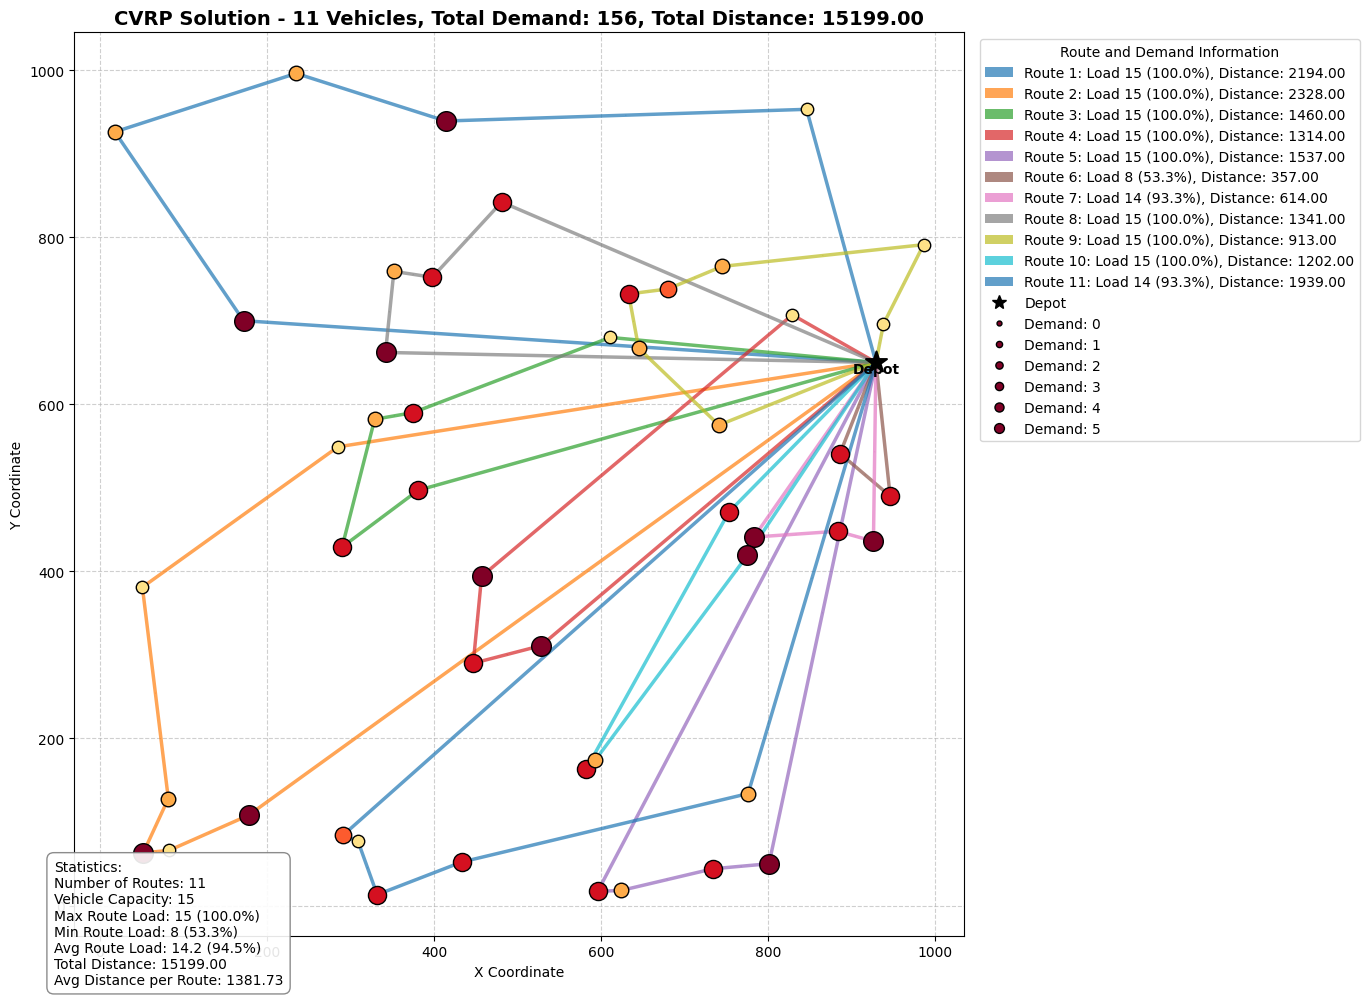

In [6]:
from cvrp.cvrp_mtz import CvrpVanillaMtz

cvrp3 = CvrpVanillaMtz(graph, depot=0, capacity=vehicle_capacity)
cvrp3.minimize_weight()
solver = cp_model.CpSolver()
solver.parameters.log_search_progress = True
solver.parameters.max_time_in_seconds = 60
status = solver.solve(cvrp3.model)
tours3 = cvrp3.extract_tours(solver)
plot_cvrp_solution(
    graph, depot=0, vehicle_capacity=vehicle_capacity, tours=tours3, show_legend=True
)
plt.show()